In [14]:
import pandas as pd
data = pd.read_csv("/content/Fremont_Bridge_Bicycle_Counter.csv", index_col= 'Date')
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
11/30/2023 11:00:00 PM,9.0,6.0,3.0
11/30/2023 10:00:00 PM,21.0,4.0,17.0
11/30/2023 09:00:00 PM,21.0,11.0,10.0
11/30/2023 08:00:00 PM,35.0,14.0,21.0
11/30/2023 07:00:00 PM,67.0,19.0,48.0


In [15]:
data.columns = ["Total", "East", "West"]
data.head()

,Total,East,West
Date,,,
11/30/2023 11:00:00 PM,9.0,6.0,3.0
11/30/2023 10:00:00 PM,21.0,4.0,17.0
11/30/2023 09:00:00 PM,21.0,11.0,10.0
11/30/2023 08:00:00 PM,35.0,14.0,21.0
11/30/2023 07:00:00 PM,67.0,19.0,48.0


In [16]:
data.dropna().describe()

,Total,East,West
count,97798.000000,97798.000000,97798.000000
mean,106.420949,46.968343,59.452606
std,132.861905,59.779567,82.932039
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,59.500000,27.000000,31.000000
75%,144.000000,65.000000,77.000000
max,1097.000000,698.000000,850.000000


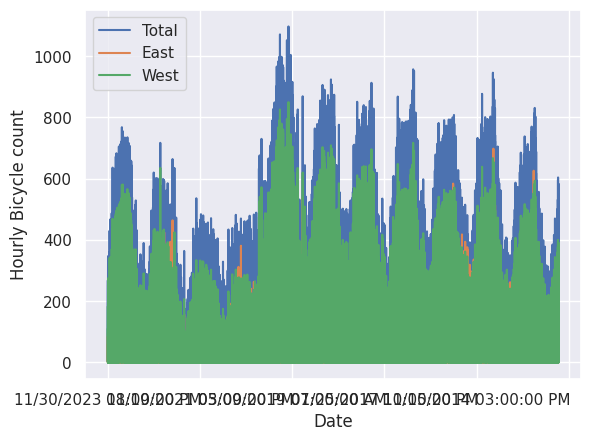

In [17]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

In [24]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

TypeError: ignored

In [19]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

TypeError: ignored

In [20]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

NameError: ignored

In [21]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()

AttributeError: ignored